In [21]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

init_printing(use_latex='mathjax')

w_0, t, g = symbols('omega_0 t g')
v_y = Function('v_y')(t)

eq = (v_y.diff(t)).diff(t) + 4*w_0 * v_y.diff(t) + w_0**2 * v_y - 4*g*w_0
eq

                                           2        
            2               d             d         
-4⋅g⋅ω₀ + ω₀ ⋅v_y(t) + 4⋅ω₀⋅──(v_y(t)) + ───(v_y(t))
                            dt             2        
                                         dt         

In [22]:
dsolve(eq)

             ω₀⋅t⋅(-2 - √3)       ω₀⋅t⋅(-2 + √3)   4⋅g
v_y(t) = C₁⋅ℯ               + C₂⋅ℯ               + ───
                                                    ω₀

In [23]:
v_y = dsolve(eq).rhs
v_y

    ω₀⋅t⋅(-2 - √3)       ω₀⋅t⋅(-2 + √3)   4⋅g
C₁⋅ℯ               + C₂⋅ℯ               + ───
                                           ω₀

In [24]:
expr_1 = v_y.subs(t, 0)
expr_1

          4⋅g
C₁ + C₂ + ───
           ω₀

In [25]:
expr_2 = (v_y.diff(t) - g).subs(t, 0)
expr_2

C₁⋅ω₀⋅(-2 - √3) + C₂⋅ω₀⋅(-2 + √3) - g

In [26]:
solution = solve([expr_1, expr_2])[0]
solution

⎧    g⋅(-12 + 7⋅√3)      -g⋅(12 + 7⋅√3) ⎫
⎨C₁: ──────────────, C₂: ───────────────⎬
⎩         6⋅ω₀                 6⋅ω₀     ⎭

In [30]:
C1_my, C2_my = solution[Symbol('C1')], solution[Symbol('C2')]
v_y_subs = v_y.subs([(Symbol('C1'), C1_my), (Symbol('C2'), C2_my), (w_0, 1), (g, 10)])
final_eq = Eq(Symbol('v_y'), v_y_subs)
final_eq

                      t⋅(-2 - √3)                  t⋅(-2 + √3)     
      5⋅(-12 + 7⋅√3)⋅ℯ              5⋅(12 + 7⋅√3)⋅ℯ                
v_y = ─────────────────────────── - ────────────────────────── + 40
                   3                            3                  

In [31]:
lf = lambdify(t, v_y_subs)

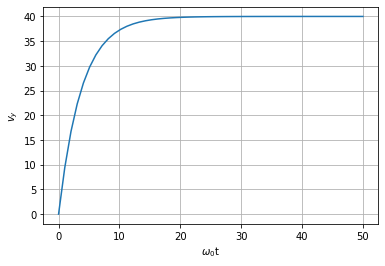

In [32]:
x_vals = np.linspace(0., 50.)
y_vals = lf(x_vals)

fig = plt.figure()
plt.grid()
plt.plot(x_vals, y_vals)
plt.xlabel('$\omega_0$t')
plt.ylabel('$v_y$')
plt.show()